In [41]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad
from scipy.special import jv # Bessel function of 1st kind

In [42]:
%run ./special_functions.ipynb

In [43]:
# quadrature
def omega(la, eps, nu):
    return 1 + eps*la**4 - nu**2

def integrand(la, r, t, a, eps, nu):
    return np.exp(-a**2*la**2/4) * la * np.sin(omega(la, eps, nu)*t) * omega(la, eps, nu) * jv(0, r*la)

def w(r, t, params):
    a, j, eps, nu = params
    val, _ = quad(integrand, 0, 100, args=(r, t, a, eps, nu),
                  limit=600, epsabs=1e-6)
    return (j/(2*np.pi)) * val

# stat phase
def w_sf(r, t, params):
    a, j, eps, _ = params
    return -j/(4*np.pi*t**2*eps)*np.exp(-a**2 * r**2 / (16 * t**2 * eps)) * r**2/(4*t) * np.cos(r**2/(4*t*np.sqrt(eps)))

## Integration

In [40]:
a = 1
j = 1
eps = 100 # eps = h^2/(12*R^2) -- small parameter??
nu = 0.3 # Poisson's constant
params = (a, j, eps, nu)

r_sections = [50, 200, 400]
t = np.linspace(0.2, 10, 2000)
w_solution = solve(w, r_sections, t, params)

C:\Users\imjob\AppData\Local\Temp/ipykernel_16396/3197582849.py:10: IntegrationWarning: The maximum number of subdivisions (600) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  val, _ = quad(integrand, 0, 100, args=(r, t, a, eps, nu),
C:\Users\imjob\AppData\Local\Temp/ipykernel_16396/3197582849.py:10: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  val, _ = quad(integrand, 0, 100, args=(r, t, a, eps, nu),


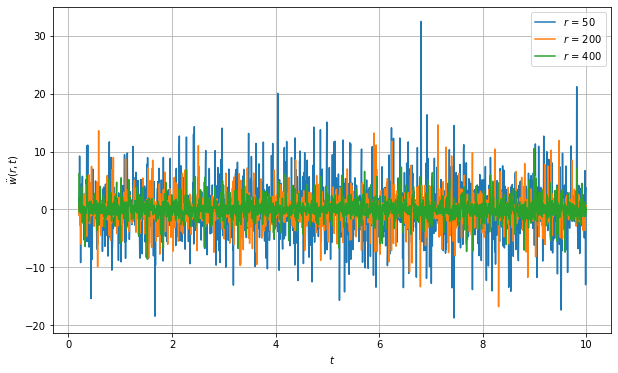

In [25]:
name = 'sphere_acceleration_r=[50,200,400]'
plot_results(t, w_solution, r_sections, figname=None, 
             lgd=r'$r$', xl=r'$t$', yl=r'$\ddot{w}(r,t)$', title=None)

## Stationary phase solution

In [44]:
a = 1
j = 1
eps = 100 # eps = h^2/(12*R^2)
nu = 0.3 # Poisson's constant
params_sf = (a, j, eps, nu)

r_sections = [50, 200, 400]
t = np.linspace(0.2, 10, 2000)
w_solution_sf = solve(w_sf, r_sections, t, params_sf)

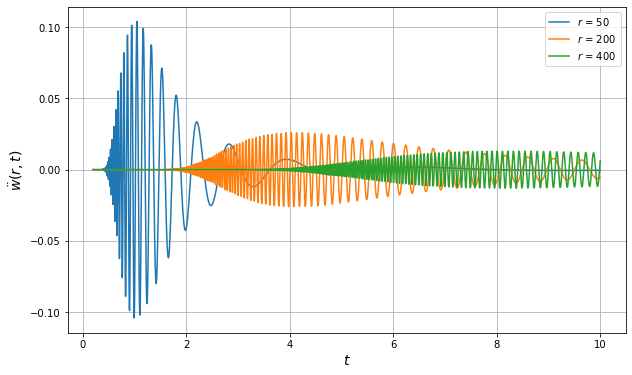

In [46]:
name = 'sphere_acceleration_r=[50,200,400]_sf'
plot_results(t, w_solution_sf, r_sections, figname=name,
             lgd=r'$r$', xl=r'$t$', yl=r'$\ddot{w}(r,t)$', fontsize=14, title=None)